# Title: Landsat 8 False Color Image
Author: Carly Caswell

Repository: https://github.com/ccaswell25/eds220-hwk4

## About

### Purpose
I will create a false color image to show the fire scar of the Thomas fire in 2017. 

### Highlights

1. Geospatial data exploration and wrangling with geopandas and numpy

2. Creating two types of images from raster data 

3. Creating and customizing a map

### Dataset Descriptions and References

**First dataset:**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

[What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

[How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset:**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

 

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

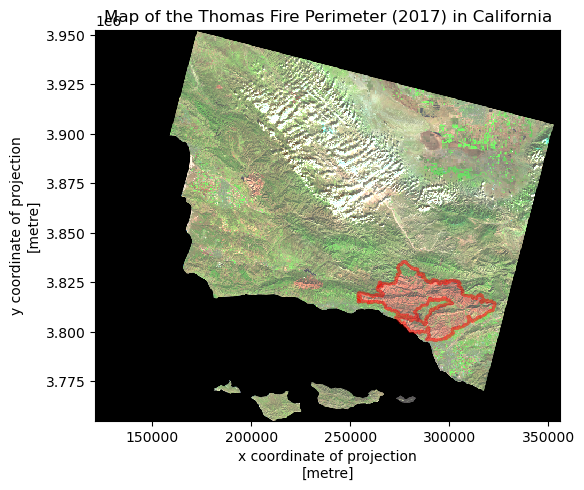

In [29]:
#IMPORTING
## Libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rioxr
import xarray as xr
from shapely.geometry import Polygon 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from shapely.geometry import Point

## Data
bands = os.path.join(os.getcwd(), 'data', 'landsat8-2018-01-26-sb-simplified.nc') #data from canvas week 7
bands = rioxr.open_rasterio(bands)
ca_fires = gpd.read_file(os.path.join(os.getcwd(), 'data', 'California_Fire_Perimeters_2017', 'California_Fire_Perimeters_2017.shp'))

#MANIPULATION
## Making the CA Fires columns lowercase 
ca_fires.columns = ca_fires.columns.str.lower()
## Removing the band from the bands dataframe:
bands = bands.squeeze()
bands = bands.drop('band')
## Making the CRS the same
ca_fires = ca_fires.to_crs(32611)
## Getting just the Thomas fire data
ca_fires_new = ca_fires[ca_fires.fire_name == "THOMAS"]

#PLOTTING
## Plotting the shapefile
fig, ax = plt.subplots()
fig.set_size_inches(size, size*aspect) #why? bc cannot use ax and size aspect together
swi_bands.plot.imshow(ax=ax, robust = True)
ca_fires_new .plot(ax=ax,facecolor='none', edgecolor='red', linewidth=2, alpha=0.5)

## Set plot title
plt.title('Map of the Thomas Fire Perimeter (2017) in California')

## Showing the plot
plt.show()


## Import libraries and functions

In [1]:
# import libraries and functions here
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rioxr
import xarray as xr
from shapely.geometry import Polygon 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from shapely.geometry import Point

## Import data

In [2]:
# Importing Landsat bands data:
bands = os.path.join(os.getcwd(), 'data', 'landsat8-2018-01-26-sb-simplified.nc') #data from canvas week 7
bands = rioxr.open_rasterio(bands)
bands

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [3]:
#Importing CA fires data:
ca_fires = gpd.read_file(os.path.join(os.getcwd(), 'data', 'California_Fire_Perimeters_2017', 'California_Fire_Perimeters_2017.shp'))
ca_fires.head() #taking a look at the ca data

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,...,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((-13244637.580 4056332.530, -13244620..."
3,19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,...,1.158548,GPS track,None,None,None,None,2010,501.178102,6859.664843,"POLYGON ((-13229521.754 4046254.111, -13229510..."
4,19840,41433,2017,CA,CCO,VNC,MONTVIEW,00040196,2017-05-15,2017-05-15,...,2.893327,Rough per description. waiting for walked GPS...,None,None,None,None,2010,484.388887,17133.006159,"POLYGON ((-13229663.036 4046858.853, -13229667..."


## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

In [4]:
#Finding dimensions of bands
print('height:', bands.rio.height)
print('width:', bands.rio.width)
print('resolution:', bands.rio.resolution())
print('dims:', bands.dims)

height: 731
width: 870
resolution: (270.0, -270.0)
dims: Frozen({'y': 731, 'x': 870, 'band': 1})


In [5]:
#Finding details of ca_fires
print('crs:', ca_fires.crs) #getting the crs

#Noticed the column names are different, made them lowercase:
ca_fires.columns = ca_fires.columns.str.lower()
ca_fires.head() #checking they were updated

crs: epsg:3857


,index,objectid,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,...,gis_acres,comments,complex_na,complex_in,irwinid,fire_num,decades,shape_leng,shape_area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,...,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((-13244637.580 4056332.530, -13244620..."
3,19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,...,1.158548,GPS track,None,None,None,None,2010,501.178102,6859.664843,"POLYGON ((-13229521.754 4046254.111, -13229510..."
4,19840,41433,2017,CA,CCO,VNC,MONTVIEW,00040196,2017-05-15,2017-05-15,...,2.893327,Rough per description. waiting for walked GPS...,None,None,None,None,2010,484.388887,17133.006159,"POLYGON ((-13229663.036 4046858.853, -13229667..."


## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [6]:
# Removing the band from the bands dataframe:
#dropping dimension:
bands = bands.squeeze()
bands = bands.drop('band')
print(bands.dims, '\n', bands.coords, '\n')

Frozen({'y': 731, 'x': 870}) 
 Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0 



## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

In [10]:
# Selecting the red, green, and blue variables from the dataset:
rgb_bands = bands[["red", "green", "blue"]]
new_bands = rgb_bands.to_array()

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

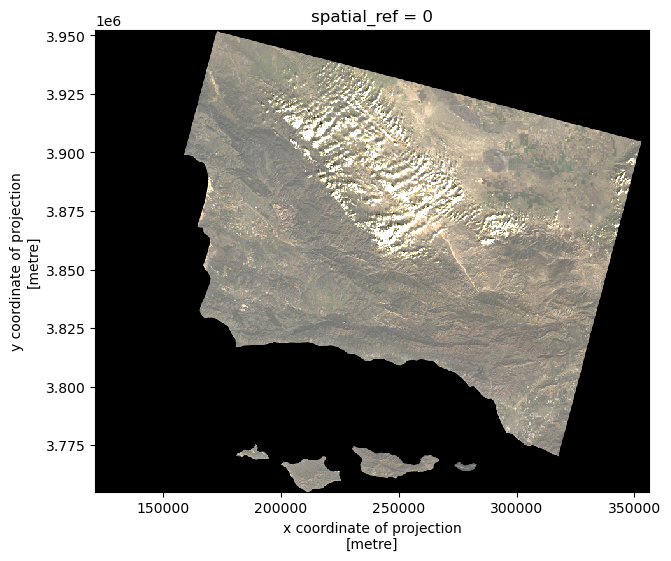

In [11]:
# Adjusting the scale and plotting the bands:
size = 6 #height in of plot 
aspect = new_bands.rio.width/new_bands.rio.height
new_bands.plot.imshow(size=size, aspect=aspect, robust= True)

## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

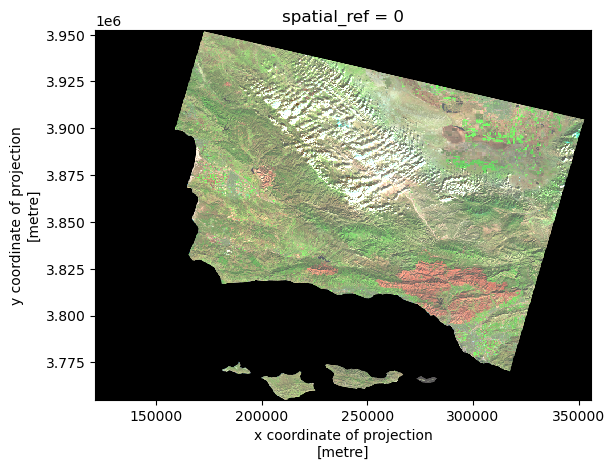

In [8]:
#Creating a false color image 
swi_bands = bands[["swir22", "nir08", "red"]]
swi_bands =swi_bands.to_array()
swi_bands.plot.imshow(robust= True)

## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [12]:
#Checking the CRS
print(ca_fires.crs)
print(swi_bands.rio.crs)
print(new_bands.rio.crs)

#I noticed they are different so I'm going to convert the CA crs
ca_fires = ca_fires.to_crs(32611)

epsg:3857
EPSG:32611
EPSG:32611


In [14]:
#Doing checks to make sure the crs updated
ca_fires.crs == swi_bands.rio.crs
ca_fires.crs == new_bands.rio.crs

True

In [55]:
#Narrowing down the ca_fires data to just look at the Thomas fire
#First I need to see what the Thomas fire is called:
ca_fires.fire_name.unique()

array(['BROOK', 'PACIFIC', 'GRADE', 'PACIFICA', 'MONTVIEW', 'PALMA',
       'CANYON', 'VISTA', 'BALDWIN', 'ROLLING', 'MCWANE',
       'SCHOOL\r\nSCHOOL', 'FORK', 'LIBBEY', 'SCALES', 'RUNNER', 'DINELY',
       'ROADRUNNER', 'ELEPHANT 2', 'TEHAMA', 'BOLLA', 'CRABTREE', 'FALLS',
       'GOLD', 'HARNEY', 'JACKSONVILLE', 'LAKE', 'MARIA', 'MILTON',
       'ORANGE', 'PALOMA', 'QUAIL', 'RED', 'TABLE', 'TWIST', 'WILLMS',
       'ZAMORA', 'POINT', 'ROCKY', 'SHANDON', 'SOLAR', 'LUCY', 'TOWER',
       'OLIVE', 'CYPRESS', 'CHALK', 'STONE', 'WEST', 'ALAMO', 'HILL',
       'GAVIOTA', 'ZENON', 'CAMATTA', 'RANCH', 'MARGARITA', 'HUASNA',
       'COVE', 'POLY', 'LINNE', 'SODA', 'LYNCH', 'CAMP', 'VILLA', 'CRAM',
       'HILT', 'CANTERA', 'EDGEWOOD', 'WHITEPINE', 'KILLGORE', 'OAKWOOD',
       'DAVIS', 'BOGUS', 'HORNBROOK', 'MACDOEL', 'APSUUN', 'BAILEY',
       'DORRIS', 'COMSTOCK', 'FAY', 'SHULMEYER', 'HAWKINSVILLE', 'MEADOW',
       'GAZELLE', 'STATELINE', 'PLEASANT', 'OWENS', 'JUNIPER', 'MARBLE',
       

In [22]:
#Filtering to just look at the Thomas fire:
ca_fires_new = ca_fires[ca_fires.fire_name == "THOMAS"]
ca_fires_new

,index,objectid,year_,state,agency,unit_id,fire_name,inc_num,alarm_date,cont_date,...,gis_acres,comments,complex_na,complex_in,irwinid,fire_num,decades,shape_leng,shape_area,geometry
436,20274,41874,2017,CA,USF,VNC,THOMAS,00003583,2017-12-04,2018-01-12,...,281790.875,CONT_DATE based on Inciweb,None,None,None,None,2010,540531.887458,1.681106e+09,"MULTIPOLYGON (((259241.263 3814482.913, 259193..."


## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

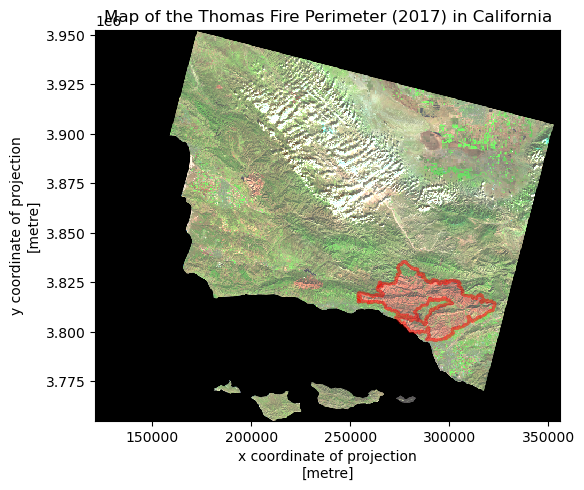

In [27]:
# Plotting the shapefile
fig, ax = plt.subplots()
fig.set_size_inches(size, size*aspect) #why? bc cannot use ax and size aspect together
swi_bands.plot.imshow(ax=ax, robust = True)
ca_fires_new .plot(ax=ax,facecolor='none', edgecolor='red', linewidth=2, alpha=0.5)

# Set plot title
plt.title('Map of the Thomas Fire Perimeter (2017) in California')

# Show the plot
plt.show()


## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the plot you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.